Importing the Libraries


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [69]:
#Loading the data from csv file to Pands's Dataframe
calories= pd.read_csv('calories.csv')

In [70]:
#Preview of our dataframe: Print the first 5 rows of our dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [71]:
exerciseData= pd.read_csv('exercise.csv')

In [72]:
exerciseData.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


Combining the Dataframes


In [73]:
caloriesData= pd.concat([exerciseData, calories['Calories']], axis= 1 )

In [74]:
caloriesData.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0


In [75]:
#Checking the number of rows and columns
caloriesData.shape

(15000, 9)

In [76]:

#Getting some information about our Dataset:
caloriesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [77]:
#Checking for missing values
caloriesData.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [78]:
#Get some statistical measures about our data
caloriesData.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data visualization

In [79]:
sns.set()

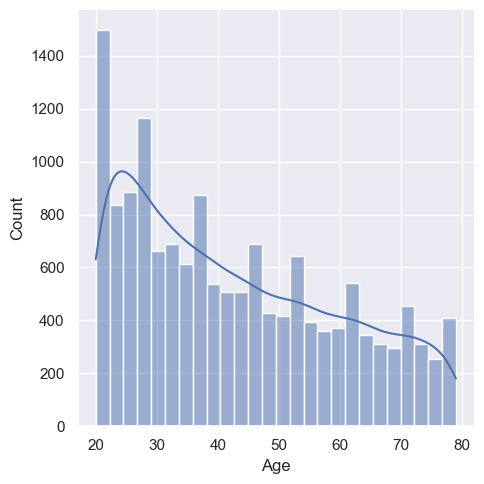

In [80]:
#finding the distribution of 'Age' column
sns.displot(caloriesData['Age'], kde=True)

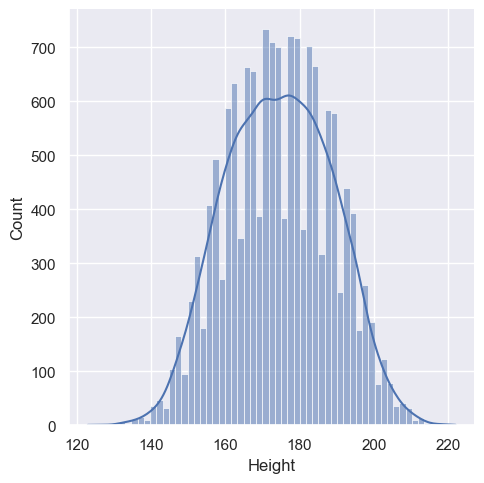

In [81]:
#finding the distribution of 'Height' column
sns.displot(caloriesData['Height'], kde=True)

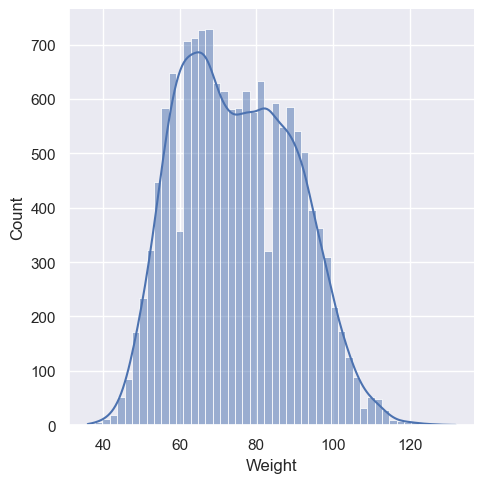

In [82]:
#finding the distribution of 'Weight' column
sns.displot(caloriesData['Weight'], kde=True)

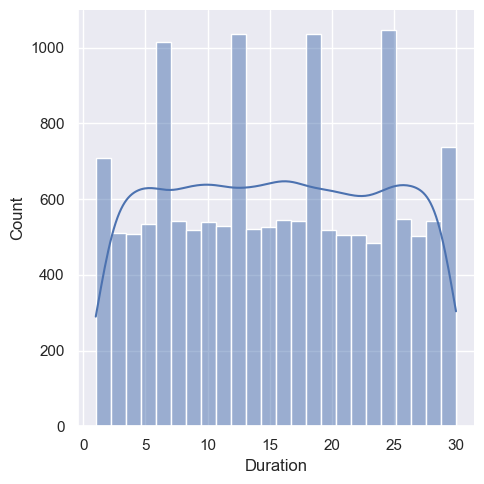

In [83]:
#finding the distribution of 'Duration' column
sns.displot(caloriesData['Duration'], kde=True)

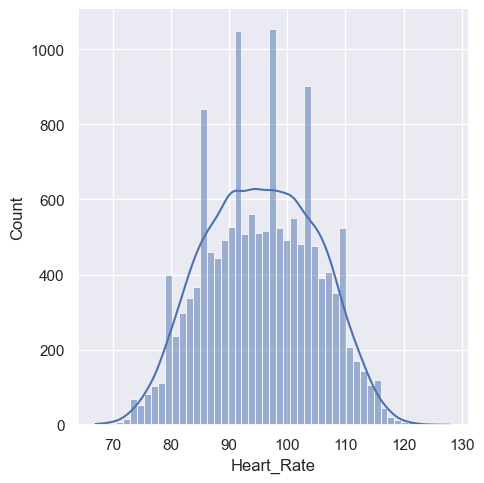

In [84]:
#finding the distribution of 'Heart_Rate' column
sns.displot(caloriesData['Heart_Rate'], kde=True)

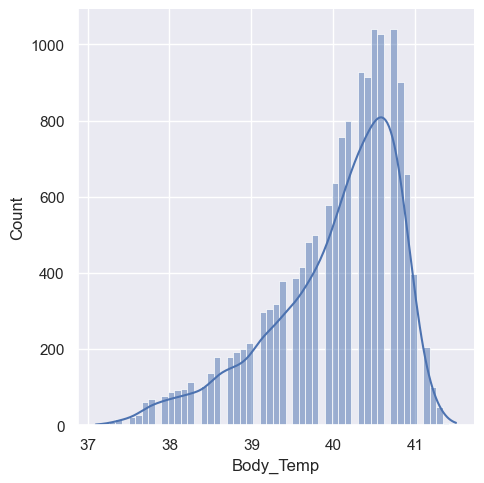

In [85]:
#finding the distribution of 'Body_Temp' column
sns.displot(caloriesData['Body_Temp'], kde=True)

Finding the Correlation in the Dataset

In [86]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = caloriesData.select_dtypes(include=[np.number])
correlation = numeric_columns.corr()
#Created an object named as 'correlation' to find the correlation relation

<Axes: >

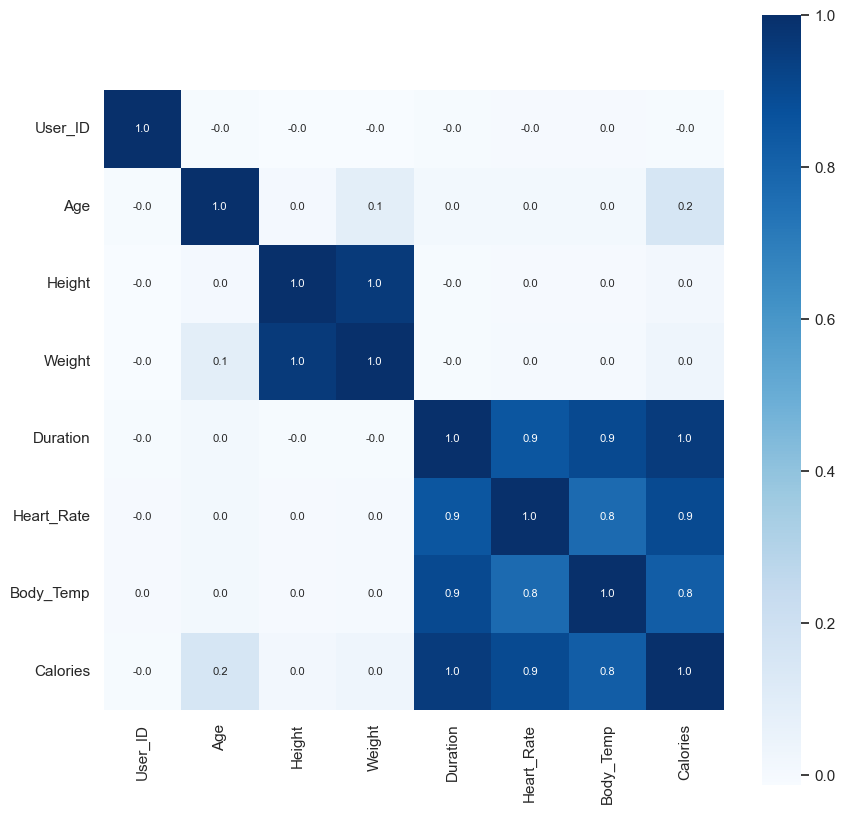

In [87]:
#constructing a heatmap to find the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar= True, square= True, fmt= '.1f', annot= True, annot_kws= {'size': 8}, cmap= 'Blues')

Categorical Data Encoding: Converting the textual data in numeircal values

In [88]:
caloriesData.replace({"Gender":{'male':0, 'female':1}}, inplace= True)

In [89]:
caloriesData.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231.0
1,14861698,1,20,166,60,14,94,40.3,66.0
2,11179863,0,69,179,79,5,88,38.7,26.0
3,16180408,1,34,179,71,13,100,40.5,71.0
4,17771927,1,27,154,58,10,81,39.8,35.0


Seperating features(determining columns: columns except our 'Calories' target) and target(target is our 'Calorie' column)

In [90]:
x= caloriesData.drop(columns= ['User_ID', 'Calories'], axis= 1)
y= caloriesData['Calories']

In [91]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [92]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data in training and test data

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 2)   # created these 4 arrays

In [94]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [95]:
# Creating a dictionary to store MAE values for each regression method
mae_dict = {}

# Creating a dictionary to store R2 square loss values for each regression method
r2_dict= {}

MODEL TRAINING:

1. Linear Regression..

In [96]:
# Initializing Linear Regression model
linear_reg = LinearRegression()

In [97]:
# Training the model
linear_reg.fit(x_train, y_train)

LinearRegression()

In [98]:
# Calculating the predictions
y_pred = linear_reg.predict(x_test)

In [99]:
# Calculating Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculating R2 score (R-squared)
r2 = metrics.r2_score(y_test, y_pred)

# Storing MAE and R2 score in dictionaries
mae_dict['Linear Regression'] = mae
r2_dict['Linear Regression'] = r2

print("Mean Absolute Error (MAE) for Linear Regression:", mae)
print("R2 Score (R-squared) for Linear Regression:", r2)

Mean Absolute Error (MAE) for Linear Regression: 8.385188053147184
R2 Score (R-squared) for Linear Regression: 0.9668790377181355


2. Polynomial Regression..

In [100]:
# Initializing PolynomialFeatures to create polynomial features
poly_features = PolynomialFeatures(degree=2)  # Adjust the degree as needed

In [101]:
# Transforming the features to polynomial features
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [102]:
# Initializing Linear Regression model
poly_reg = LinearRegression()

#  Train the model
poly_reg.fit(x_train_poly, y_train)

LinearRegression()

In [103]:
# Calculating the predictions
y_pred = poly_reg.predict(x_test_poly)

In [104]:
# Calculating Mean Absolute Error (MAE) and R2 score
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

mae_dict['Polynomial Regression'] = mae
r2_dict['Polynomial Regression'] = r2

print("Mean Absolute Error (MAE) for Polynomial Regression:", mae)
print("R2 Score (R-squared) for Polynomial Regression:", r2)

Mean Absolute Error (MAE) for Polynomial Regression: 2.2420376833810525
R2 Score (R-squared) for Polynomial Regression: 0.9976631789876684


3. Decision Tree Regression..

In [105]:
# Initializing Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor()

In [106]:
# Training the model
decision_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [107]:
# Calculating the predictions
y_pred = decision_tree_reg.predict(x_test)

In [108]:
# Calculating Mean Absolute Error (MAE) and R2 score
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

mae_dict['Decision Tree Regression'] = mae
r2_dict['Decision Tree Regression'] = r2

print("Mean Absolute Error (MAE) for Decision Tree Regression:", mae)
print("R2 Score (R-squared) for Decision Tree Regression:", r2)

Mean Absolute Error (MAE) for Decision Tree Regression: 3.3926666666666665
R2 Score (R-squared) for Decision Tree Regression: 0.9929370571028759


In [109]:
# THE ACCURACY IN THE ABOVE MODEL SEEMS TO BE OVERFITTED, THEREFORE, WE ARE APPLYING PRUNING TECHNIQUE IN OUR DECISION TREE MODEL

# Initialize Decision Tree Regression model with parameters for pruning
decision_tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [110]:
# Training the model
decision_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [111]:
# Calculating the predictions
y_pred = decision_tree_reg.predict(x_test)

In [112]:
# Calculating Mean Absolute Error (MAE) and R2 square
mae = metrics.mean_absolute_error(y_test, y_pred)

mae_dict['Pruned Decision Tree Regression'] = mae
r2_dict['Pruned Decision Tree Regression'] = r2

print("Mean Absolute Error (MAE) for Pruned Decision Tree Regression:", mae)
print("R2 Score (R-squared) for Pruned Decision Tree Regression:", r2)

Mean Absolute Error (MAE) for Pruned Decision Tree Regression: 8.879720962989303
R2 Score (R-squared) for Pruned Decision Tree Regression: 0.9929370571028759


4. Random Forest Regression..

In [113]:
# Initializing Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [114]:
# Training the model
random_forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [115]:
# Calculating the predictions
y_pred = random_forest_reg.predict(x_test)

In [116]:
# Calculating Mean Absolute Error (MAE) and R2 score
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

mae_dict['Random Forest Regression'] = mae
r2_dict['Random Forest Regression'] = r2

print("Mean Absolute Error (MAE) for Random Forest Regression:", mae)
print("R2 Score (R-squared) for Random Forest Regression:", r2)

Mean Absolute Error (MAE) for Random Forest Regression: 1.6750500000000001
R2 Score (R-squared) for Random Forest Regression: 0.9982492876904432


5. SVR

In [117]:
# Initializing SVR model
svr_model = SVR(kernel='linear')

In [118]:
# Training the SVR model
svr_model.fit(x_train, y_train)

SVR(kernel='linear')

In [119]:
# Calculating the predictions
y_pred = svr_model.predict(x_test)

In [120]:
# Calculating Mean Absolute Error (MAE) and R2 score
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

mae_dict['SVR'] = mae
r2_dict['SVR'] = r2

print("Mean Absolute Error (MAE) for SVR:", mae)
print("R2 Score (R-squared) for SVR:", r2)

Mean Absolute Error (MAE) for SVR: 8.102392992019952
R2 Score (R-squared) for SVR: 0.9642993012068602


6. XGBoost Regressor

In [121]:
# Initializing XGBoost Regressor model
xgb_reg = XGBRegressor()


In [122]:
# Training the model
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [123]:
# Calculating the predictions
y_pred = xgb_reg.predict(x_test)


In [124]:
# Calculating Mean Absolute Error (MAE) and R2 score
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

mae_dict['XGBoost Regressor'] = mae
r2_dict['XGBoost Regressor'] = r2

print("Mean Absolute Error (MAE) for XGBoost Regressor:", mae)
print("R2 Score (R-squared) for XGBoost Regressor:", r2)


Mean Absolute Error (MAE) for XGBoost Regressor: 1.4833678883314132
R2 Score (R-squared) for XGBoost Regressor: 0.998800624504713


Finding the Regression model with minimum MAE

In [125]:
# Find the regression model with the minimum MAE
min_mae_model = min(mae_dict, key=mae_dict.get)
min_mae = mae_dict[min_mae_model]

In [126]:
print("Mean Absolute Errors:")
for method, mae in mae_dict.items():
    print(f"{method}: {mae}")

Mean Absolute Errors:
Linear Regression: 8.385188053147184
Polynomial Regression: 2.2420376833810525
Decision Tree Regression: 3.3926666666666665
Pruned Decision Tree Regression: 8.879720962989303
Random Forest Regression: 1.6750500000000001
SVR: 8.102392992019952
XGBoost Regressor: 1.4833678883314132


In [127]:
print(f"The method with the minimum MAE is {min_mae_model} with MAE: {min_mae}")


The method with the minimum MAE is XGBoost Regressor with MAE: 1.4833678883314132


In [128]:
# Finding the regression model with the best R2 score
best_model = max(r2_dict, key=r2_dict.get)
best_r2_score = r2_dict[best_model]

print("Mean Absolute Errors:")
for method, r2 in r2_dict.items():
    print(f"{method}: {r2}")

Mean Absolute Errors:
Linear Regression: 0.9668790377181355
Polynomial Regression: 0.9976631789876684
Decision Tree Regression: 0.9929370571028759
Pruned Decision Tree Regression: 0.9929370571028759
Random Forest Regression: 0.9982492876904432
SVR: 0.9642993012068602
XGBoost Regressor: 0.998800624504713


In [129]:
# Printing the best model and its R2 score
print("Regression model with the best R2 score:", best_model)
print("Best R2 score:", best_r2_score)

Regression model with the best R2 score: XGBoost Regressor
Best R2 score: 0.998800624504713
